# Profitable Application Profile

The aim of the project is to conduct market testing in order to determine the genre of application that is going to be the most profitable in both iOS and Android application store. This analysis is to be used by developers to create a profitable application.

Since most popular applications are free of cost and makes most of its revenue form in-app advertisements, we will focus on this area for further analysis. The measure of profitability is directly influenced by the number of users in the application and their corresponding engagement with advertisements.

## Input data sets

There are over 2.2 million iOS apps available on the App Store and 3.4 million Android apps on Google Play. Most of these applications doesn't have enough users for further analysis, so we'll try to analyze a sample of most popular applications on both stores.

* `googleplaystore.csv` data set contains data on approximately 10,000 Android apps from Google Play. The data was collected in August 2018. You can download or view the data set using the following [link](https://www.kaggle.com/lava18/google-play-store-apps).

* `AppleStore.csv` data set contains data on approximately 7,000 iOS apps from the App Store. The data was collected in July 2017. You can download or view the data set using the following [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

In [1]:
# Reading both datasets 

from csv import reader

# gooleplaystore.csv for Android store
open_googlestore = open("googleplaystore.csv",encoding='utf8')
read_googlestore = reader(open_googlestore)
googlestore = list(read_googlestore)
googlestore_header = googlestore[0]
googlestore_data = googlestore[1:]

# AppleStore.csv for iOS store
open_applestore = open("AppleStore.csv",encoding='utf8')
read_applestore = reader(open_applestore)
applestore = list(read_applestore)
applestore_header = applestore[0]
applestore_data = applestore[1:]

To make it easier to explore the data set we created explore_data() function. This function is used to print the data set rows in a more readable format.

It takes in four parameters:
* `dataset`, which is expected to be a list of lists and it doesn't include the header row.
* `start and end`, which are both expected to be integers and represent the starting and the ending indices of a slice from the data set.
* `rows_and_columns`, which is expected to be a Boolean and has `False` as a default argument.

It slices the data set using `dataset[start:end]` and prints the result. It also prints the number of rows and columns if `rows_and_columns` is `True`.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

**Lets have a look into Android store data set.**

In [3]:
print(googlestore_header)
print("\n")
explore_data(googlestore_data,0,2,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


`googleplaystore.csv` data set has 10841 rows and 13 columns. Upon quick analysis, the columns that might be useful are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'. Documentation on this data set can be found in the following [link](https://www.kaggle.com/lava18/google-play-store-apps).

**Lets have a look into iOS store data set.**

In [4]:
print(applestore_header)
print("\n")
explore_data(applestore_data,0,2,True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5', '4', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


Number of rows: 7197
Number of columns: 16


`AppleStore.csv` data set has 7197 rows and 16 columns. Upon quick analysis, the columns that might be useful are 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. Documentation on this data set can be found in the following [link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

## Data Cleaning

### Deleting incorrect data from the data set

The Google Play data set has a dedicated [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that one of the [discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) describes an error in 10472 row. Let's check whether its true or not.

In [5]:
check_value = {}
check_value = dict(zip(googlestore_header,googlestore_data[10472]))
print(check_value)

{'App': 'Life Made WI-Fi Touchscreen Photo Frame', 'Category': '1.9', 'Rating': '19', 'Reviews': '3.0M', 'Size': '1,000+', 'Installs': 'Free', 'Type': '0', 'Price': 'Everyone', 'Content Rating': '', 'Genres': 'February 11, 2018', 'Last Updated': '1.0.19', 'Current Ver': '4.0 and up', 'Android Ver': ''}


The `Rating` column in google play store should have a maximum value of 5 and this row has a value of 19. This error was caused due to missing `Category` value as mentioned in the [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015). As a result we will delete this row.

In [6]:
print(len(googlestore_data))
del googlestore_data[10472]
print(len(googlestore_data))

10841
10840


### Removing duplicate entries

**Checking for duplicate entries**

Now we will check whether there are any duplicate entries in `googleplaystore.csv` data set.

In [7]:
unique_googlestore = []
duplicate_googlestore = []

for element in googlestore_data:
    googlestore_name = element[0]
    if googlestore_name not in unique_googlestore:
        unique_googlestore.append(googlestore_name)
    else:
        duplicate_googlestore.append(googlestore_name)

print(f'The total number of rows in googleplaystore.csv is {len(googlestore_data)}')
print(f'The total number of unique rows in googleplaystore.csv is {len(unique_googlestore)}')
print(f'The total number of duplicate rows in googleplaystore.csv is {len(duplicate_googlestore)}')

print("\n",duplicate_googlestore[:15])

The total number of rows in googleplaystore.csv is 10840
The total number of unique rows in googleplaystore.csv is 9659
The total number of duplicate rows in googleplaystore.csv is 1181

 ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


As seen from the above result, there are a total of 1181 duplicate entries in `googleplaystore.csv` data set. We will remove these duplicates in the next section.

Now we will check whether there are any duplicate entries in `AppleStore.csv` data set.

In [8]:
unique_applestore = []
duplicate_applestore= []

for element in applestore_data:
    applestore_name = element[1]
    if applestore_name not in unique_applestore:
        unique_applestore.append(applestore_name)
    else:
        duplicate_applestore.append(applestore_name)

print(f'The total number of rows in AppleStore.csv is {len(applestore_data)}')
print(f'The total number of unique rows in AppleStore.csv is {len(unique_applestore)}')
print(f'The total number of duplicate rows in AppleStore.csv is {len(duplicate_applestore)}')

print("\n",duplicate_applestore)

The total number of rows in AppleStore.csv is 7197
The total number of unique rows in AppleStore.csv is 7195
The total number of duplicate rows in AppleStore.csv is 2

 ['Mannequin Challenge', 'VR Roller Coaster']


As seen from the above result, there are a total of 2 duplicate entries in `AppleStore.csv` data set. We will remove these duplicates in the next section.

**Removing duplicate entries from the data set**

In `googleplaystore.csv` data set, the fourth position of each row corresponds to the number of reviews. The different numbers shows that the data was collected at different times. We can use this to build a criterion for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews as it represents the latest information.

To do this process, we have to do the following steps:

* Create a dictionary, where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.
* Use the information stored in the dictionary and create a new data set, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

In [9]:
reviews_max = {}
for element in googlestore_data:
    name = element[0]
    n_reviews = float(element[3])
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
print(len(reviews_max ))

9659


Above we made a dictionary `reviews_max` that stores the maximum ratings value along with the corresponding application name. The total number of unique entries is 9659. This matches the earlier result we received in duplicate checking process. Thus all unique entries are added to the dictionary.

Now, let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:

* We start by initializing two empty lists, `android_clean` and `already_added`.
* We loop through the android data set, and for every iteration:
    * We isolate the name of the app and the number of reviews.
    * We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
        * The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max  dictionary; and
        * The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for `reviews_max[name] == n_reviews`, we'll still end up with duplicate entries for some apps.

In [10]:
android_clean = []
already_added = []
for element in googlestore_data:
    name = element[0]
    n_reviews = float(element[3])
    if (name not in already_added) and (reviews_max[name] == n_reviews):
        android_clean.append(element)
        already_added.append(name)
print(len(android_clean))
print(len(already_added))

9659
9659


As we have 9659 rows, we have removed all duplicates in 'googleplaystore.csv' data set and stored the result in `android_clean` list.

Next we will try to view the rows of duplication in `AppleStore.csv` data set.

In [11]:
temp_dict = {}
for duplicate_value in duplicate_applestore:
    for element in applestore_data:
        if element[1] == duplicate_value:
            temp_dict = dict(zip(applestore_header,element))
            print(temp_dict,"\n")  

{'id': '1173990889', 'track_name': 'Mannequin Challenge', 'size_bytes': '109705216', 'currency': 'USD', 'price': '0', 'rating_count_tot': '668', 'rating_count_ver': '87', 'user_rating': '3', 'user_rating_ver': '3', 'ver': '1.4', 'cont_rating': '9+', 'prime_genre': 'Games', 'sup_devices.num': '37', 'ipadSc_urls.num': '4', 'lang.num': '1', 'vpp_lic': '1'} 

{'id': '1178454060', 'track_name': 'Mannequin Challenge', 'size_bytes': '59572224', 'currency': 'USD', 'price': '0', 'rating_count_tot': '105', 'rating_count_ver': '58', 'user_rating': '4', 'user_rating_ver': '4.5', 'ver': '1.0.1', 'cont_rating': '4+', 'prime_genre': 'Games', 'sup_devices.num': '38', 'ipadSc_urls.num': '5', 'lang.num': '1', 'vpp_lic': '1'} 

{'id': '952877179', 'track_name': 'VR Roller Coaster', 'size_bytes': '169523200', 'currency': 'USD', 'price': '0', 'rating_count_tot': '107', 'rating_count_ver': '102', 'user_rating': '3.5', 'user_rating_ver': '3.5', 'ver': '2.0.0', 'cont_rating': '4+', 'prime_genre': 'Games', 'su

Due to the variation in `id` and `track_name` column as shown above, we won't delete these rows from the data set because they are unique data points.

### Removing Non-English Apps

We use English for the apps we develop at our company, and we'd like to analyze only the apps that are directed toward an English-speaking audience. However, if we explore the data long enough, we'll find that both data sets have apps with names that suggest they are not directed toward an English-speaking audience.

In [12]:
print(applestore_data[813][1])
print(applestore_data[6731][1])
print("\n")
print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜


中国語 AQリスニング
لعبة تقدر تربح DZ


We can remove the above rows using the ASCII values. This can be achieved with the help of `ord()`. We will classify any character that has an ASCII value greater than 127 as non english character.

In [13]:
def is_english(input_str):
    for character in input_str:
        if ord(character) > 127:
            return False
    return True
print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [14]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


The function couldn't correctly identify certain English app names like 'Docs To Go™ Free Office Suite' and 'Instachat 😜'. This is because emojis and characters like ™ fall outside the ASCII range and have corresponding numbers over 127. If we're going to use the function we've created, we'll lose useful data since many English apps will be incorrectly labeled as non-English. To minimize the impact of data loss, we'll only remove an app if its name has more than three characters with corresponding numbers falling outside the ASCII range. This means all English apps with up to three emoji or other special characters will still be labeled as English. Our filter function is still not perfect, but it should be fairly effective.

In [15]:
def isenglish(input_str):
    count = 0
    for character in input_str:
        if ord(character) > 127:
            count += 1
    if count > 3:
        return False
    return True

print(isenglish('Docs To Go™ Free Office Suite'))
print(isenglish('Instachat 😜'))

True
True


In [16]:
print(f'The number of rows before deleting non english in android store was {len(android_clean)}')
print(f'The number of rows before deleting non english in iOS store was {len(applestore_data)}')
print("\n")

android_english = []
ios_english = []

for element in android_clean:
    name = element[0]
    if isenglish(name):
        android_english.append(element)

for element in applestore_data:
    name = element[1]
    if isenglish(name):
        ios_english.append(element)

explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

The number of rows before deleting non english in android store was 9659
The number of rows before deleting non english in iOS store was 7197


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5', '4', '10.23', '12+', 'Photo & Vide

We have 9614 apps in android store and 6183 apps in iOS store.

### Removing Non-Free Apps

As we are only interested in the analysis of free apps, we remove all non free apps from the data set.

In [17]:
android_final = []
ios_final = []

for element in android_english:
    price = element[7]
    if price == '0':
        android_final.append(element)
        
for element in ios_english:
    price = element[4]
    if price == '0':
        ios_final.append(element)
        
explore_data(android_final, 0, 3, True)
print('\n')
explore_data(ios_final, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 8864
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0', '2974676', '212', '3.5', '3.5', '95', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0', '2161558', '1289', '4.5', '4', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '

We're finally left with 8864 Android apps and 3222 iOS apps, this should be enough for our analysis.

## Data Analysis

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

* Build a minimal Android version of the app, and add it to Google Play.
* If the app has a good response from users, we then develop it further.
* If the app is profitable after six months, we also build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both the App Store and Google Play, we need to find app profiles that are successful on both markets. For instance, a profile that might work well for both markets might be a productivity app that makes use of gamification.

### Most common genre

Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table for the `prime_genre` column of the App Store data set, and the `Genres` and `Category` columns of the Google Play data set.

We'll build two functions we can use to analyze the frequency tables:

* One function to generate frequency tables that show percentages
* Another function we can use to display the percentages in a descending order

In [18]:
# function to generate frequency tables that show percentages
def freq_table(dataset, index):
    freq_dict = dict()
    for element in dataset:
        key_dict = element[index]
        if key_dict in freq_dict:
            freq_dict[key_dict] += 1
        else:
            freq_dict[key_dict] = 1

    no_of_rows = len(dataset)
    for element in freq_dict:
        freq_dict[element] = ((freq_dict[element])/(no_of_rows))*100
    return freq_dict

# function to display the percentages in a descending order
def display_table(dataset, index):
    freq_dict = freq_table(dataset,index)
    table_display = []
    
    for key,value in freq_dict.items():
        table_display.append((value,key))
        
    table_sorted = sorted(table_display,reverse = True)
    for element in table_sorted:
        print(element[1],":",element[0])

We start by examining the frequency table for the `prime_genre` column of the App Store data set.

In [19]:
display_table(ios_final,11)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the `Genres` and `Category` columns of the Google Play data set (two columns which seem to be related).

In [20]:
display_table(android_final, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) mostly contians games for kids. Family cateogry was changed to children recently and this is evident from the url present in the screenchot.

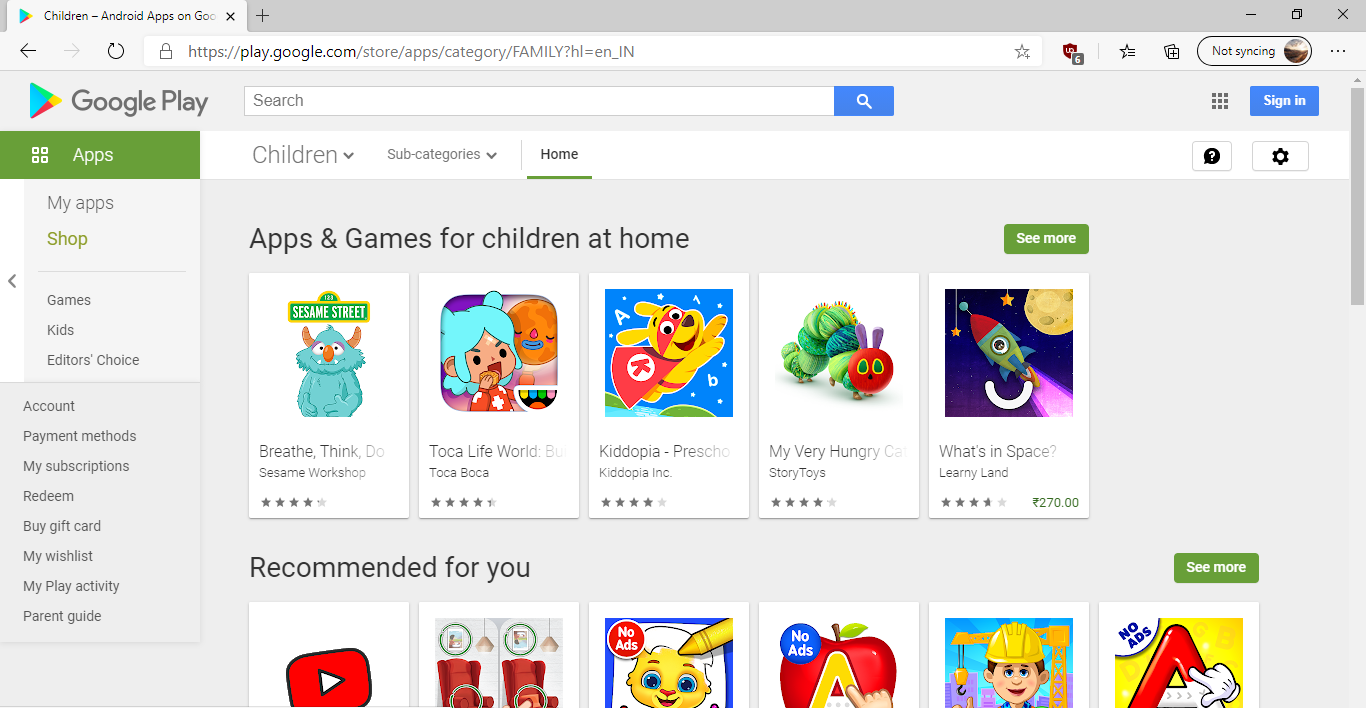

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [21]:
display_table(android_final,9)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

### Most popular apps by genre

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the `Installs` column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the `rating_count_tot` app.

We will write a function `popular()` to calculate the average number of installs for each app genre. Function will take `data set`, `index of genre` and `index of install count` as input parameters. It will return genre and the corresponding average install count in descending order.

To calculating the average number of install count per app genre, we'll need to do the following:

* Isolate the apps of each genre.
* Sum up the install count for the apps of that genre.
* Divide the sum by the number of apps belonging to that genre (not by the total number of apps).


In [22]:
def popular(dataset,index_genre,index_install):
    app_genre = freq_table(dataset,index_genre)
    app_install = {}
    for genre in app_genre:
        total = 0
        len_genre = 0
        for row in dataset:
            if genre == row[index_genre]:
                total += float(row[index_install])
                len_genre += 1
        avg = total / len_genre
        app_install[genre] = avg

    # To sort genre and average install count in descending order.
    table_display = []
    for key,value in app_install.items():
        table_display.append((value,key))
    table_display = sorted(table_display,reverse = True)
    return table_display

#### Popular Apps in iOS Store

In [23]:
ios_genre = popular(ios_final,11,5)
for element in ios_genre:
    print(element[1],":",element[0])

Navigation : 86090.33333333333
Reference : 74942.11111111111
Social Networking : 71548.34905660378
Music : 57326.530303030304
Weather : 52279.892857142855
Book : 39758.5
Food & Drink : 33333.92307692308
Finance : 31467.944444444445
Photo & Video : 28441.54375
Travel : 28243.8
Shopping : 26919.690476190477
Health & Fitness : 23298.015384615384
Sports : 23008.898550724636
Games : 22788.6696905016
News : 21248.023255813954
Productivity : 21028.410714285714
Utilities : 18684.456790123455
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Business : 7491.117647058823
Education : 7003.983050847458
Catalogs : 4004.0
Medical : 612.0


By looking at the average rating count, navigation genre has the maximum value followed by reference, social networking, music and weather. This high number may be due to widely popular few apps in each genre. We need to analyze further to find a suitable app profile. 

In [24]:
ios_navigation = []
for element in ios_final:
    if element[11] == "Navigation":
        ios_navigation.append((float(element[5]),element[1]))

ios_navigation = sorted(ios_navigation,reverse = True)
for element in ios_navigation:
    print(element[1],":",element[0])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046.0
Google Maps - Navigation & Transit : 154911.0
Geocaching® : 12811.0
CoPilot GPS – Car Navigation & Offline Maps : 3582.0
ImmobilienScout24: Real Estate Search in Germany : 187.0
Railway Route Search : 5.0


As seen from the above result, a few successful apps make up the majority of user rating count in navigation genre. Thus we need to eliminate these applications from our analysis to predict a suitable app profile.

To achieve this, we will eliminate applications that have the maximum user rating count from each genre and try to display the average user rating count for the rest. In order to achieve this goal, we need to modify `popular()`. A new parameter `no_eliminate` is added to specify the number of top apps that needs to be eliminated. 

In [25]:
def popular(dataset,index_genre,index_install,no_eliminate):
    app_genre = freq_table(dataset,index_genre)
    app_install = {}
    for genre in app_genre:
        install_list = []
        for row in dataset:
            if genre == row[index_genre]:
                install_list.append(float(row[index_install]))
        install_list.sort(reverse=True)
        app_install[genre] = install_list[no_eliminate:]

    # To find the average of install count
    avg_app = {}
    for genre,install_list in app_install.items():
        if len(install_list) == 0:                 # To overcome division by zero exception
            avg = 0
            avg_app[genre] = avg
            continue
        avg = sum(install_list)/len(install_list)
        avg_app[genre] = avg
        
    # To sort genre and average install count in descending order.
    table_display = []
    for key,value in avg_app.items():
        table_display.append((value,key))
    table_display = sorted(table_display,reverse = True)    
    
    return table_display

First we will eliminate one popular app from each genre and see if there is any change in top five rankings or not. Current top 5 genres are as follows:

1. Navigation : 86090.33333333333
2. Reference : 74942.11111111111
3. Social Networking : 71548.34905660378
4. Music : 57326.530303030304
5. Weather : 52279.892857142855

In [26]:
ios_genre = popular(ios_final,11,5,1)
for element in ios_genre:
    print(element[1],":",element[0])

Social Networking : 43899.514285714286
Music : 40871.876923076925
Weather : 35859.666666666664
Navigation : 34299.2
Finance : 25702.17142857143
Book : 23426.384615384617
Food & Drink : 22513.04
Shopping : 22210.5421686747
Games : 21663.193806727177
Reference : 21355.176470588234
Sports : 19067.91176470588
Productivity : 18482.29090909091
Travel : 17527.358974358973
Health & Fitness : 15729.140625
Photo & Video : 15025.716981132075
News : 13323.97619047619
Utilities : 12925.0125
Entertainment : 12864.557312252964
Lifestyle : 9956.1
Education : 5673.239316239316
Business : 5541.75
Catalogs : 890.3333333333334
Medical : 466.2


As seen from the above observation, there is a drastic change in ranking. Reference genre is no longer in top five and navigation genre currently have fourth rank. Lets try to remove 2 popular apps this time and see the change.

In [27]:
ios_genre = popular(ios_final,11,5,2)
for element in ios_genre:
    print(element[1],":",element[0])

Social Networking : 34113.70192307692
Weather : 29213.96153846154
Music : 27782.953125
Games : 20753.534188034188
Finance : 19606.941176470587
Shopping : 19283.341463414636
Book : 16605.75
Sports : 16506.68656716418
Productivity : 16306.74074074074
Photo & Video : 13070.784810126583
Food & Drink : 12675.083333333334
Travel : 12096.894736842105
Entertainment : 11757.722222222223
Utilities : 11437.354430379746
News : 10412.292682926829
Reference : 10186.9375
Health & Fitness : 10044.920634920634
Lifestyle : 7240.102040816327
Education : 4660.163793103448
Business : 4261.6
Navigation : 4146.25
Catalogs : 322.0
Medical : 283.25


Navigation genre have also lost its place in top five. Lets try to remove 3 popular apps and see the result.

In [28]:
ios_genre = popular(ios_final,11,5,3)
for element in ios_genre:
    print(element[1],":",element[0])

Social Networking : 30818.504854368934
Weather : 22839.2
Music : 21828.31746031746
Games : 20250.572955638694
Shopping : 17768.814814814814
Finance : 16571.60606060606
Sports : 14336.560606060606
Productivity : 14289.603773584906
Photo & Video : 11382.28025477707
Entertainment : 10817.278884462152
Book : 10473.363636363636
Utilities : 9956.448717948719
Travel : 8490.081081081082
Food & Drink : 8272.434782608696
Health & Fitness : 7999.951612903225
News : 7850.45
Reference : 7254.4
Lifestyle : 5297.666666666667
Education : 3861.2608695652175
Business : 3132.5
Navigation : 1258.0
Catalogs : 213.0
Medical : 9.666666666666666


Lets remove 4 popular apps this time.

In [29]:
ios_genre = popular(ios_final,11,5,4)
for element in ios_genre:
    print(element[1],":",element[0])

Social Networking : 27674.901960784315
Games : 19820.5192513369
Weather : 17534.25
Music : 17450.90322580645
Shopping : 16355.6375
Finance : 13355.5
Productivity : 12377.692307692309
Sports : 12277.738461538462
Photo & Video : 10664.00641025641
Entertainment : 10126.848
Utilities : 8676.57142857143
Travel : 7164.972222222223
Health & Fitness : 6417.3442622950815
News : 6319.4358974358975
Reference : 5859.285714285715
Book : 4975.7
Lifestyle : 4123.36170212766
Food & Drink : 3678.0454545454545
Education : 3385.5526315789475
Business : 2473.769230769231
Navigation : 96.0
Medical : 0.0
Catalogs : 0


Lets remove 5 popular apps and check whether there is any difference in ranking.

In [30]:
ios_genre = popular(ios_final,11,5,5)
for element in ios_genre:
    print(element[1],":",element[0])

Social Networking : 24639.079207920793
Games : 19453.323167469236
Music : 15511.672131147541
Shopping : 14963.784810126583
Weather : 12026.434782608696
Productivity : 11360.411764705883
Finance : 10506.354838709678
Sports : 10314.09375
Photo & Video : 9937.529032258064
Entertainment : 9480.550200803213
Utilities : 7484.894736842105
Travel : 5956.371428571429
Health & Fitness : 5016.033333333334
Reference : 4893.2307692307695
News : 4861.421052631579
Lifestyle : 3130.0434782608695
Education : 3005.221238938053
Food & Drink : 2617.6190476190477
Business : 1961.3333333333333
Book : 214.22222222222223
Navigation : 5.0
Medical : 0.0
Catalogs : 0


The gap between Social Networking and Games genre is shortening as we remove more popular apps. Now lets remove 10 apps from each genre and check whether this trend continues.

In [31]:
ios_genre = popular(ios_final,11,5,10)
for element in ios_genre:
    print(element[1],":",element[0])

Games : 17785.946351931332
Social Networking : 14930.0
Shopping : 9875.108108108108
Productivity : 7610.95652173913
Entertainment : 7519.983606557377
Photo & Video : 7214.033333333334
Music : 7070.428571428572
Sports : 6384.3050847457625
Finance : 4600.153846153846
Utilities : 4335.422535211268
Health & Fitness : 2830.8545454545456
Education : 2080.6944444444443
Lifestyle : 1555.8536585365853
Travel : 1503.1666666666667
News : 1324.030303030303
Weather : 590.1666666666666
Food & Drink : 550.1875
Reference : 478.125
Business : 283.57142857142856
Navigation : 0
Medical : 0
Catalogs : 0
Book : 0.0


Games genre has taken the first place as expected. Lets try to remove 25 apps this time and check for variation.

In [32]:
ios_genre = popular(ios_final,11,5,25)
for element in ios_genre:
    print(element[1],":",element[0])

Games : 14464.578691184424
Social Networking : 6023.185185185185
Entertainment : 4060.943231441048
Shopping : 4000.576271186441
Photo & Video : 3758.859259259259
Productivity : 2528.3548387096776
Music : 1873.7560975609756
Sports : 1183.0681818181818
Health & Fitness : 955.85
Utilities : 880.6071428571429
Education : 814.4516129032259
Lifestyle : 348.8076923076923
Travel : 141.2
News : 85.61111111111111
Finance : 61.09090909090909
Food & Drink : 1.0
Weather : 0.0
Reference : 0
Navigation : 0
Medical : 0
Catalogs : 0
Business : 0
Book : 0


Games genre continues to be at the top spot. Further there is a huge difference in average count between games and the next popular genre. This gap tends to widen as we remove more apps from each genre. 

> Thus we can conclude that `Games` is the best genre for an application profile in Free-English iOS store.

#### Popular Apps in Android Store

The following are the input parameter details for android store:

* Input data set is `android_final`. 
* Index for `Category` column is 1 
* Index for `Installs` column is 5 

In [33]:
# Checking the data points in andriod_final before analysis
for element in android_final[:10]:
    print(element[1],":",element[5])

ART_AND_DESIGN : 10,000+
ART_AND_DESIGN : 5,000,000+
ART_AND_DESIGN : 50,000,000+
ART_AND_DESIGN : 100,000+
ART_AND_DESIGN : 50,000+
ART_AND_DESIGN : 50,000+
ART_AND_DESIGN : 1,000,000+
ART_AND_DESIGN : 1,000,000+
ART_AND_DESIGN : 10,000+
ART_AND_DESIGN : 1,000,000+


We need to remove the plus sign in `Installs` column for further analysis.

In [34]:
temp_android = []
for element in android_final:
    element[5] = element[5][:-1]
    temp_android.append(element)
android_final = temp_android

for element in android_final[:10]:
    print(element[1],":",element[5]) 

ART_AND_DESIGN : 10,000
ART_AND_DESIGN : 5,000,000
ART_AND_DESIGN : 50,000,000
ART_AND_DESIGN : 100,000
ART_AND_DESIGN : 50,000
ART_AND_DESIGN : 50,000
ART_AND_DESIGN : 1,000,000
ART_AND_DESIGN : 1,000,000
ART_AND_DESIGN : 10,000
ART_AND_DESIGN : 1,000,000


Now we need to remove `,` from Install column for further analysis.

In [35]:
for element in android_final:
    install = element[5]
    temp_list = []
    for character in install:
        if ord(character) != 44:
            temp_list.append(character)
    install = ""
    for character in temp_list:
        install += character
    element[5] = install

for element in android_final[:10]:
    print(element[1],":",element[5]) 

ART_AND_DESIGN : 10000
ART_AND_DESIGN : 5000000
ART_AND_DESIGN : 50000000
ART_AND_DESIGN : 100000
ART_AND_DESIGN : 50000
ART_AND_DESIGN : 50000
ART_AND_DESIGN : 1000000
ART_AND_DESIGN : 1000000
ART_AND_DESIGN : 10000
ART_AND_DESIGN : 1000000


In [36]:
# To check for blank values in Install column
row = 0
for element in android_final:
    row += 1
    if element[5] == "":
        print(element[1],":",element[5])
        print(row-1)

FAMILY : 
7298


In [37]:
android_final[7298]

['Command & Conquer: Rivals',
 'FAMILY',
 'NaN',
 '0',
 'Varies with device',
 '',
 'NaN',
 '0',
 'Everyone 10+',
 'Strategy',
 'June 28, 2018',
 'Varies with device',
 'Varies with device']

As the entry for `Install` column is empty as shown above, we will delete this row from the data set `android_final`.

In [38]:
del android_final[7298]

Now lets try to analyse Android store data using `popular()`

In [39]:
android_genre = popular(android_final,1,5,0)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 38456119.167247385
VIDEO_PLAYERS : 24727872.452830188
SOCIAL : 23253652.127118643
PHOTOGRAPHY : 17840110.40229885
PRODUCTIVITY : 16787331.344927534
GAME : 15588015.603248259
TRAVEL_AND_LOCAL : 13984077.710144928
ENTERTAINMENT : 11640705.88235294
TOOLS : 10801391.298666667
NEWS_AND_MAGAZINES : 9549178.467741935
BOOKS_AND_REFERENCE : 8767811.894736841
SHOPPING : 7036877.311557789
PERSONALIZATION : 5201482.6122448975
WEATHER : 5074486.197183099
HEALTH_AND_FITNESS : 4188821.9853479853
MAPS_AND_NAVIGATION : 4056941.7741935486
FAMILY : 3697848.1731343283
SPORTS : 3638640.1428571427
ART_AND_DESIGN : 1986335.0877192982
FOOD_AND_DRINK : 1924897.7363636363
EDUCATION : 1833495.145631068
BUSINESS : 1712290.1474201474
LIFESTYLE : 1437816.2687861272
FINANCE : 1387692.475609756
HOUSE_AND_HOME : 1331540.5616438356
DATING : 854028.8303030303
COMICS : 817657.2727272727
AUTO_AND_VEHICLES : 647317.8170731707
LIBRARIES_AND_DEMO : 638503.734939759
PARENTING : 542603.6206896552
BEAUTY : 51315

Now lets try to delete popular apps from each category and check whether there is any variation in rankings.

In [40]:
android_genre = popular(android_final,1,5,1)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 35094077.625874124
SOCIAL : 19097284.689361703
VIDEO_PLAYERS : 18555264.050632913
GAME : 14444679.965156794
PHOTOGRAPHY : 14062572.365384616
PRODUCTIVITY : 13929154.982558139
ENTERTAINMENT : 10588809.523809524
TOOLS : 9480698.897196261
TRAVEL_AND_LOCAL : 9197592.650485437
SHOPPING : 6567366.590909091
NEWS_AND_MAGAZINES : 5539256.113360324
PERSONALIZATION : 4877938.184300342
WEATHER : 4432693.142857143
BOOKS_AND_REFERENCE : 3523197.1428571427
SPORTS : 3317435.61
MAPS_AND_NAVIGATION : 3276916.9105691058
FAMILY : 3102685.597371565
HEALTH_AND_FITNESS : 2365986.7720588236
FOOD_AND_DRINK : 1850814.2293577981
EDUCATION : 1753431.3725490195
BUSINESS : 1470202.1921182266
HOUSE_AND_HOME : 1211145.2916666667
LIFESTYLE : 1152128.779710145
ART_AND_DESIGN : 1128948.2142857143
FINANCE : 1086125.7859327218
DATING : 798260.7134146341
COMICS : 647613.8888888889
AUTO_AND_VEHICLES : 531852.6049382716
LIBRARIES_AND_DEMO : 524339.1463414634
PARENTING : 376684.3859649123
BEAUTY : 330712.5
EVE

In [41]:
android_genre = popular(android_final,1,5,2)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 31708442.810526315
SOCIAL : 14905392.743589744
GAME : 13880080.755813954
PHOTOGRAPHY : 13730767.625482626
PRODUCTIVITY : 12512038.81632653
VIDEO_PLAYERS : 12304023.694267515
ENTERTAINMENT : 9511566.26506024
TOOLS : 8824924.430481283
SHOPPING : 6093089.263959391
PERSONALIZATION : 4552177.698630137
TRAVEL_AND_LOCAL : 4364410.175609756
WEATHER : 3772297.3913043477
NEWS_AND_MAGAZINES : 3529253.0894308942
FAMILY : 3044767.298266587
BOOKS_AND_REFERENCE : 3010022.659574468
SPORTS : 2994082.551839465
MAPS_AND_NAVIGATION : 2484104.7540983604
HEALTH_AND_FITNESS : 2005713.6605166052
FOOD_AND_DRINK : 1775358.8055555555
EDUCATION : 1671782.1782178218
BUSINESS : 1226918.7407407407
HOUSE_AND_HOME : 1087358.6056338027
LIFESTYLE : 1010129.1540697674
ART_AND_DESIGN : 967656.3636363636
FINANCE : 936083.226993865
DATING : 741808.3251533742
COMICS : 565493.3962264151
AUTO_AND_VEHICLES : 413500.7625
LIBRARIES_AND_DEMO : 407355.6790123457
PARENTING : 294125.1785714286
BEAUTY : 239157.84313725

In [42]:
android_genre = popular(android_final,1,5,3)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 28298965.496478874
PHOTOGRAPHY : 13396390.755813954
GAME : 13314166.996507566
PRODUCTIVITY : 11086635.421052631
SOCIAL : 10677518.892703863
VIDEO_PLAYERS : 9177767.435897436
ENTERTAINMENT : 8408048.780487806
TOOLS : 8167394.208835341
SHOPPING : 5613972.37244898
PERSONALIZATION : 4224178.30927835
TRAVEL_AND_LOCAL : 3895608.2647058824
WEATHER : 3092478.2352941176
FAMILY : 2986779.7188995215
SPORTS : 2836344.5738255032
BOOKS_AND_REFERENCE : 2491359.679144385
MAPS_AND_NAVIGATION : 2091411.4049586777
HEALTH_AND_FITNESS : 1827957.0444444444
FOOD_AND_DRINK : 1698493.0
EDUCATION : 1588500.0
NEWS_AND_MAGAZINES : 1502841.8775510204
BUSINESS : 1106193.292079208
LIFESTYLE : 983919.6180758018
HOUSE_AND_HOME : 960035.1571428571
FINANCE : 908194.2523076923
ART_AND_DESIGN : 800390.7407407408
DATING : 684658.9938271604
COMICS : 480214.42307692306
AUTO_AND_VEHICLES : 355443.8101265823
LIBRARIES_AND_DEMO : 287447.625
PARENTING : 281291.0909090909
BEAUTY : 223941.0
MEDICAL : 86233.36774193

In [43]:
android_genre = popular(android_final,1,5,4)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 24865392.93639576
PHOTOGRAPHY : 13059411.73151751
GAME : 12746934.090909092
PRODUCTIVITY : 9652871.88856305
VIDEO_PLAYERS : 8591817.548387097
SOCIAL : 8568370.26724138
TOOLS : 7508101.171581769
ENTERTAINMENT : 7277283.950617284
SHOPPING : 5129941.461538462
PERSONALIZATION : 3893916.855172414
TRAVEL_AND_LOCAL : 3422187.615763547
FAMILY : 2928722.734889288
SPORTS : 2677544.387205387
WEATHER : 2392365.970149254
BOOKS_AND_REFERENCE : 1967119.677419355
HEALTH_AND_FITNESS : 1797577.7026022305
MAPS_AND_NAVIGATION : 1692173.1666666667
FOOD_AND_DRINK : 1620176.8962264152
EDUCATION : 1503535.3535353534
NEWS_AND_MAGAZINES : 1304083.0327868853
BUSINESS : 984868.7096774194
LIFESTYLE : 957556.8099415204
FINANCE : 880133.1234567901
HOUSE_AND_HOME : 829021.1739130435
ART_AND_DESIGN : 626813.2075471698
DATING : 626799.7329192547
COMICS : 391591.17647058825
AUTO_AND_VEHICLES : 295898.21794871794
PARENTING : 267981.6666666667
LIBRARIES_AND_DEMO : 227795.06329113923
BEAUTY : 208103.0612244

In [44]:
android_genre = popular(android_final,1,5,5)
for element in android_genre:
    print(element[1],":",element[0])

COMMUNICATION : 21407468.797872342
PHOTOGRAPHY : 12719800.05859375
GAME : 12178377.421236873
PRODUCTIVITY : 8210674.4529411765
VIDEO_PLAYERS : 7998257.922077922
TOOLS : 6847038.2201342285
SOCIAL : 6440960.614718615
ENTERTAINMENT : 6118250.0
SHOPPING : 4640920.541237113
PERSONALIZATION : 3561369.8546712804
TRAVEL_AND_LOCAL : 2944079.6336633665
FAMILY : 2870596.221556886
SPORTS : 2517671.2263513515
WEATHER : 2277098.787878788
HEALTH_AND_FITNESS : 1766971.6492537314
MAPS_AND_NAVIGATION : 1622359.4957983193
FOOD_AND_DRINK : 1540369.0571428572
BOOKS_AND_REFERENCE : 1437212.2162162163
EDUCATION : 1416836.7346938776
NEWS_AND_MAGAZINES : 1268297.3662551441
LIFESTYLE : 931039.3812316715
BUSINESS : 862940.5223880596
FINANCE : 851898.2414860681
HOUSE_AND_HOME : 694153.8382352941
DATING : 568217.23125
ART_AND_DESIGN : 446559.6153846154
COMICS : 299423.0
PARENTING : 254170.0
AUTO_AND_VEHICLES : 234805.98701298703
BEAUTY : 191605.20833333334
LIBRARIES_AND_DEMO : 166612.94871794872
MEDICAL : 80299.81

In [45]:
android_genre = popular(android_final,1,5,10)
for element in android_genre:
    print(element[1],":",element[0])

GAME : 11662992.312206572
PHOTOGRAPHY : 10981150.657370517
COMMUNICATION : 10963560.292418772
PRODUCTIVITY : 6840684.519402985
TOOLS : 5677085.775675676
VIDEO_PLAYERS : 5246521.610738255
SOCIAL : 4371070.362831858
ENTERTAINMENT : 3726133.3333333335
SHOPPING : 3440944.894179894
FAMILY : 2578916.3303303304
PERSONALIZATION : 2215619.323943662
TRAVEL_AND_LOCAL : 1952812.61928934
SPORTS : 1839280.6975945018
WEATHER : 1644074.0983606558
HEALTH_AND_FITNESS : 1610450.1977186312
MAPS_AND_NAVIGATION : 1254919.1228070175
BOOKS_AND_REFERENCE : 1199357.0
FOOD_AND_DRINK : 1117387.51
NEWS_AND_MAGAZINES : 1084858.2352941176
EDUCATION : 1062903.2258064516
LIFESTYLE : 796084.6101190476
FINANCE : 708060.1635220125
BUSINESS : 546352.8715365239
HOUSE_AND_HOME : 415912.07936507935
DATING : 328482.30322580645
COMICS : 221581.11111111112
AUTO_AND_VEHICLES : 181667.51388888888
PARENTING : 176479.375
ART_AND_DESIGN : 132363.82978723405
LIBRARIES_AND_DEMO : 109531.64383561644
BEAUTY : 97605.81395348837
MEDICAL :

In [46]:
android_genre = popular(android_final,1,5,25)
for element in android_genre:
    print(element[1],":",element[0])

GAME : 10079891.816009559
PHOTOGRAPHY : 6594359.385593221
COMMUNICATION : 4339336.645038168
TOOLS : 3725577.2055172413
PRODUCTIVITY : 2942591.60625
SHOPPING : 2415738.9942528736
ENTERTAINMENT : 2157666.6666666665
VIDEO_PLAYERS : 2027848.656716418
FAMILY : 2026603.4484848485
SOCIAL : 1743421.336492891
SPORTS : 1395763.3442028984
PERSONALIZATION : 1335449.3977695168
TRAVEL_AND_LOCAL : 1289582.8901098901
HEALTH_AND_FITNESS : 1103017.75
EDUCATION : 562179.4871794871
NEWS_AND_MAGAZINES : 507606.5470852018
MAPS_AND_NAVIGATION : 485462.42424242425
WEATHER : 462793.9130434783
BOOKS_AND_REFERENCE : 429601.57575757575
FINANCE : 413079.64356435643
LIFESTYLE : 397147.753894081
FOOD_AND_DRINK : 349867.65882352943
BUSINESS : 240581.38743455498
HOUSE_AND_HOME : 233384.60416666666
DATING : 142248.26428571428
AUTO_AND_VEHICLES : 41755.45614035088
ART_AND_DESIGN : 41284.375
PARENTING : 38515.454545454544
COMICS : 35705.0
MEDICAL : 28584.527777777777
LIBRARIES_AND_DEMO : 24065.689655172413
BEAUTY : 12394

Free-English android store is much more stable when compared to Free-English iOS store. The ranking for categories remains comparatively stable even when we remove most popular apps from the store. Gaming, Communication, Photography tends to be the most commonly used genre. Communication represents Social Networking genre. At first glance Communication(Social Networking) tends to be the most widely used category. After removing most popular apps from each genre, the ranking changes and games emerges as the most popular category.  

Games category takes the top spot. Further there is a huge difference in average count between games and the next popular genre. This gap tends to widen as we remove more apps from each genre. 

> Thus we can conclude that `Games` is the best genre for an application profile in Free-English Android store.

## Conclusion

In this project, we analyzed the data from both iOS and Android application store, with the goal of recommending an application profile that can be profitable in both markets. Gaming is the most popular category in both Android and iOS stores by the two criteria as shown below.

* By the number of applications present in store for each category
* By the number of users for each category

Initial assessment that the gaming category was oversaturated with more apps doesn't hold true, as the number of users are equally high for this category. So Games can be a good genre for a profitable application profile.